**Proposta de Atividade:** Utilize o arquivo dados.csv para realizar as ações solicitadas e comente os resultados e procedimentos das operações produzidas.

In [46]:
# Importar bibliotecas Python
import pandas as pd
import matplotlib.pyplot as plt

Na etapa acima foram importadas as bibliotecas necessárias para as ações de análise de dados (pandas) e de plotagem e visualização de gráficos (matplotlib).

In [10]:
# Carregar e visualizar base dados.csv
df = pd.read_csv('/content/dados.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [12]:
# Analisar tamanho da amostra
df.shape

(1000, 8)

In [14]:
# Analisar composição da amostra
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [30]:
# Verificar dados nulos
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Nas ações acima foi utilizado a biblioteca pandas para carregar o arquivo dados.csv. Em seguida foi verificado que o tamanho da amostra é de 1000 linhas (casos) por 8 colunas (atributos), sendo cinco do tipo string e de natureza socioeconomica e três do tipo inteiro e de natureza discreta. Não foram identificados dados nulos na amostra.

**Desafio 01:** Calcule quais os valores mínimos, máximos e médios de pontuação de cada matéria (matemática, leitura e escrita).

In [32]:
# Gerar estatística descritiva
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Alternativa pontuação mínima
df['math score'].min()
df['reading score'].min()
df['writing score'].min()
# Alternativa pontuação máxima
df['math score'].max()
df['reading score'].max()
df['writing score'].max()
# Alternativa pontuação média
df['math score'].mean()
df['reading score'].mean()
df['writing score'].mean()

Nas ações acima são calculados os valores mínimos, máximos e médios das pontuações das matérias. No primeiro caso é utilizado o recurso df.describe() para gerar um resumo da estatística descritiva, enquanto que no segundo caso são apresentados os modelos alternativos para verificação dos valores solicitados. Em síntese, todas a matérias conseguiram alcançar o máximo de pontuação (100), contudo matématica apresentou a menor média (66) devido ao seu valor mínimo (0); leitura alcançou a melhor média (69.1) apresentando um ponto mínimo mais elevado na amostragem (17), enquanto que escrita manteve valor intermediário em sua média (68) e mínimo (10). A diferença entre os resultados dos atributos é reforçada pela amplitude da variação das amostras no 1º quartil.

**Desafio 02:** Agrupe o banco de dados a partir da raça/etnia dos alunos, e plote um gráfico com a nota média em Matemática para cada grupo disponível.

In [39]:
# Agrupar BD por raça/etnia e pontuação média matemática
df2 = df.groupby('race/ethnicity')[['math score']].mean()
df2

,math score
race/ethnicity,
group A,61.629213
group B,63.452632
group C,64.463950
group D,67.362595
group E,73.821429


<Axes: title={'center': 'Pontuação Média por Grupo'}, xlabel='race/ethnicity'>

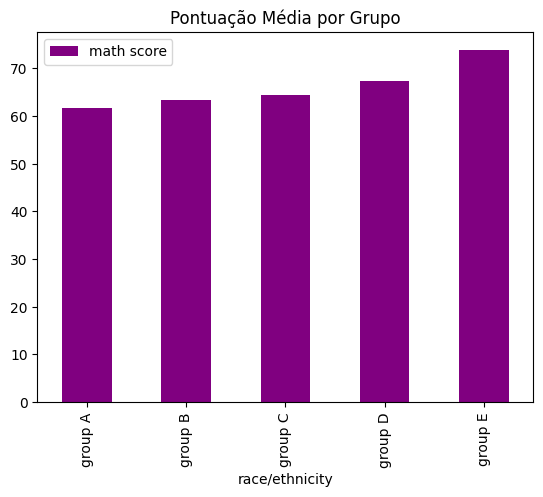

In [66]:
df2.plot(kind='bar',color='purple',title='Pontuação Média por Grupo')

Nas ações acima foi construido um dataframe com o agrupamento das pontuações médias de matemática por grupo de raça/etnicidade. No gráfico é possível visualizar que os grupos D e E são aqueles que permanecem acima da média da amostra (66.08), registrando médias de 67.36 e 73.82, respectivamente; os grupos A, B e C mantiveram-se abaixo da média global.

**Desafio 03:** Agrupe o banco de dados a partir do Nível de Escolaridade dos pais, e plote um gráfico com a nota média em Escrita para cada grupo disponível.

In [74]:
# Agrupar BD por Escolaridade dos pais e pontuação média escrita
df3 = df.groupby('parental level of education')[['writing score']].mean()
df3

,writing score
parental level of education,
associate's degree,69.896396
bachelor's degree,73.381356
high school,62.448980
master's degree,75.677966
some college,68.840708
some high school,64.888268


<Axes: title={'center': 'Pontuação Média por Escolaridade dos pais'}, ylabel='parental level of education'>

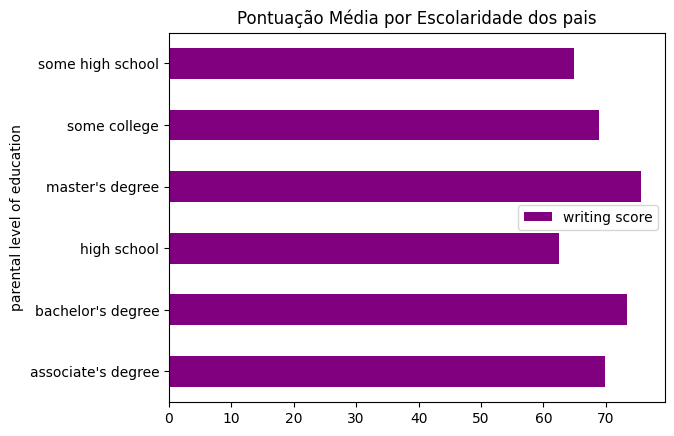

In [75]:
df3.plot(kind='barh',color='purple',title='Pontuação Média por Escolaridade dos pais')

Nas ações acima foi construido um dataframe com o agrupamento das pontuações médias de escrita por grupo de nível de escolaridade paterna. No gráfico é possível visualizar uma relação entre o grau de escolaridade paterna com o desempenho das notas na matéria escrita. As maiores médias estão associadas aos individuos cujos pais estudaram até o nível de mestrado e graduação, enquanto que os menores estão associados àqueles que não possuem pais com ensino superior.

**Desafio 04:** Agrupe o banco de dados a partir da coluna referente à participação em um curso preparatório para os testes, e plote um gráfico com a nota média em Leitura para cada grupo disponível.


In [76]:
# Agrupar BD por participação em cursos preparatórios e pontuação média leitura
df4 = df.groupby('test preparation course')[['reading score']].mean()
df4

,reading score
test preparation course,
completed,73.893855
none,66.534268


<Axes: title={'center': 'Pontuação Média por Participação em Preparatórios'}, xlabel='test preparation course'>

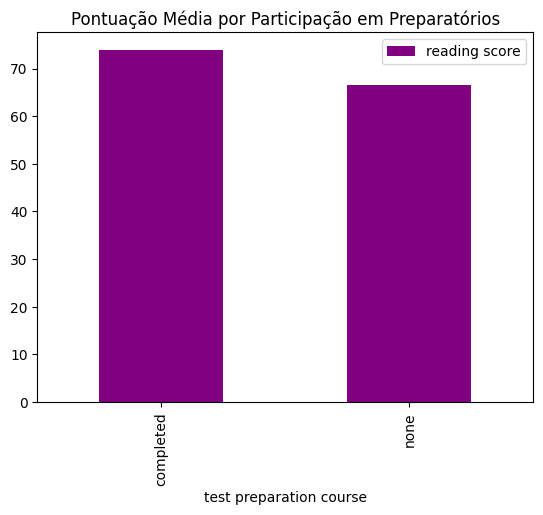

In [80]:
df4.plot(kind='bar',color='purple',title='Pontuação Média por Participação em Preparatórios')

Nas ações acima foi construido um dataframe com o agrupamento das pontuações médias de leitura por grupo de participantes em cursos preparatórios. No gráfico é possível visualizar uma relação entre a participação nos cursos preparatórios com o desempenho das notas na matéria leitura. As maiores médias estão associadas aos individuos que participaram nos cursos preparatórios, enquanto que os não participantes registram médias inferiores à média global.